/workspace/bag/sg_exp/sg_exp_0.db3
                          row_time         msec   data
0    2024/12/30 06:59:34.420489900     0.000000  203.0
1    2024/12/30 06:59:34.420507231     0.017331  203.0
2    2024/12/30 06:59:34.421854592     1.364692  203.0
3    2024/12/30 06:59:34.423603930     3.114030  203.0
4    2024/12/30 06:59:34.425145416     4.655516  203.0
..                             ...          ...    ...
798   2024/12/30 06:59:36.62167371  1641.677471  203.0
799   2024/12/30 06:59:36.63861487  1643.371587  203.0
800   2024/12/30 06:59:36.65895345  1645.405445  203.0
801   2024/12/30 06:59:36.67058665  1646.568765  203.0
802   2024/12/30 06:59:36.68712699  1648.222799  203.0

[803 rows x 3 columns]
                         row_time         msec  header_stamp_secs  \
0   2024/12/30 06:59:34.524239331   103.749431               5628   
1    2024/12/30 06:59:35.29808752   609.318852               5629   
2    2024/12/30 06:59:35.81215206   660.725306               5629   
3   2

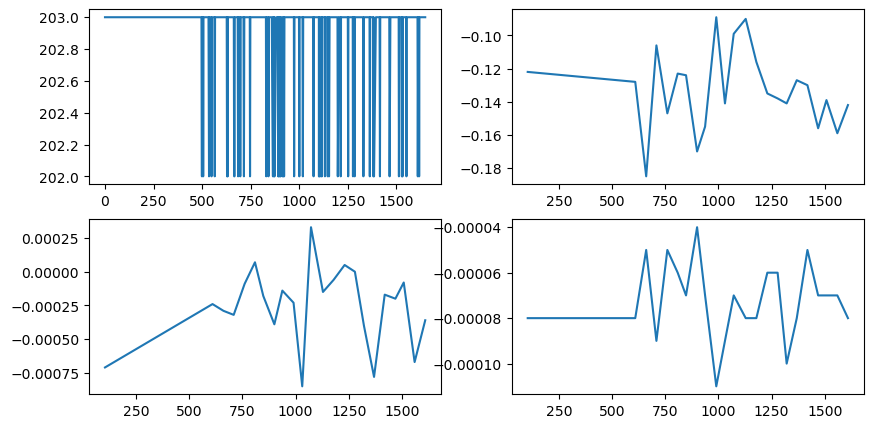

In [2]:
import os 
import sys
#devconatinerでパスが通らないため以下を指定
sys.path.append("/workspace")
from rosbag2_py import SequentialReader, StorageOptions, ConverterOptions
import pandas as pd
import bag_converter
import matplotlib.pyplot as plt

if __name__ == "__main__":
    bag_converter = bag_converter.BagConverter()

    #1 .devコンテナを使うなら絶対パスを指定
    path = "/workspace/bag/sg_exp/sg_exp_0.db3"
    #2 ローカルに環境を構築しているなら相対パスで指定可能
    #path = "../bag/sg_exp_new-pad_kyuchaku/sg_exp_0.db3"
    print(path)
    bag_converter.connectDB(path)
    res1 = bag_converter.getTopicDataWithPandas("/sg/pressure")
    print(res1)
    res2 = bag_converter.getTopicDataWithPandas("/sg/wrench")
    print(res2)


    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
    ax3 = fig.add_subplot(2, 2, 3)
    ax4 = fig.add_subplot(2, 2, 4)
    ax1.plot(res1['msec'].to_numpy(), res1['data'].to_numpy())
    ax2.plot(res2['msec'].to_numpy(), res2['wrench_force_z'].to_numpy())
    ax3.plot(res2['msec'].to_numpy(), res2['wrench_torque_x'].to_numpy())
    ax4.plot(res2['msec'].to_numpy(), res2['wrench_torque_y'].to_numpy())
    plt.show()


    